In [1]:
import pandas as pd

import sys
sys.path.append("..")

import multi_prophet

In [2]:
df = pd.read_csv("../data/example_wp_log_peyton_manning.csv")
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


## Country holidays

In [3]:
m = multi_prophet.MultiProphet(columns=["y"])
m.add_country_holidays(country_name="US")
m.fit(df)

future_df = m.make_future_dataframe(periods=10)
forecast = m.predict(future_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'y': <Figure size 648x864 with 4 Axes>}

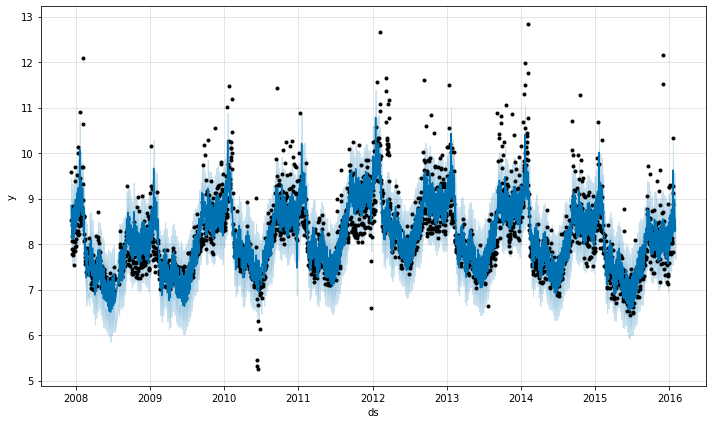

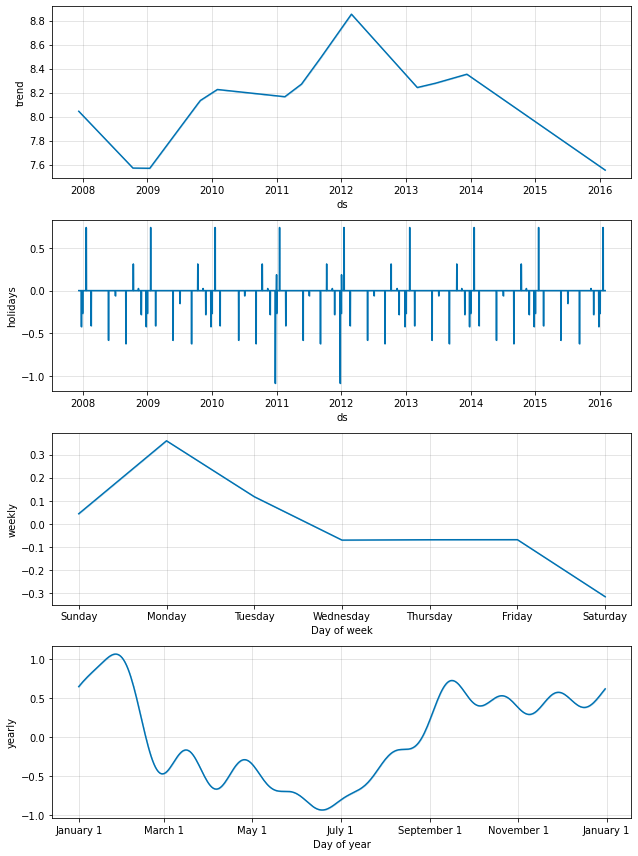

In [4]:
m.plot(forecast)
m.plot_components(forecast)

## Modeling holidays and special events

In [5]:
playoffs = pd.DataFrame({
  "holiday": "playoff",
  "ds": pd.to_datetime(["2008-01-13", "2009-01-03", "2010-01-16",
                        "2010-01-24", "2010-02-07", "2011-01-08",
                        "2013-01-12", "2014-01-12", "2014-01-19",
                        "2014-02-02", "2015-01-11", "2016-01-17",
                        "2016-01-24", "2016-02-07"]),
  "lower_window": 0,
  "upper_window": 1,
})
superbowls = pd.DataFrame({
  "holiday": "superbowl",
  "ds": pd.to_datetime(["2010-02-07", "2014-02-02", "2016-02-07"]),
  "lower_window": 0,
  "upper_window": 1,
})
holidays = pd.concat((playoffs, superbowls))

In [6]:
m = multi_prophet.MultiProphet(columns=["y"], holidays=holidays)
m.fit(df)

future_df = m.make_future_dataframe(periods=10)
forecast = m.predict(future_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'y': <Figure size 648x864 with 4 Axes>}

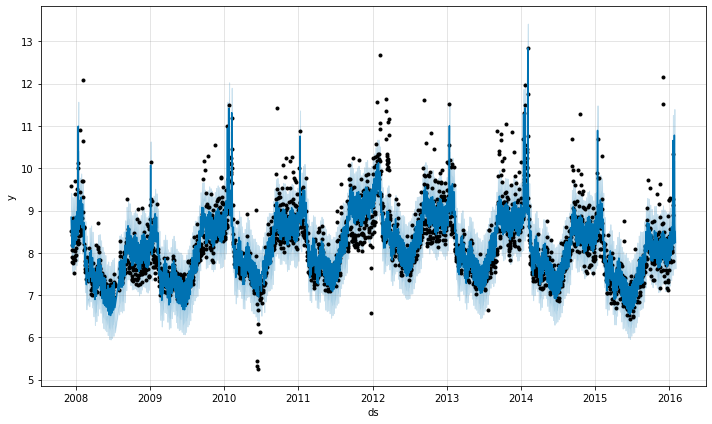

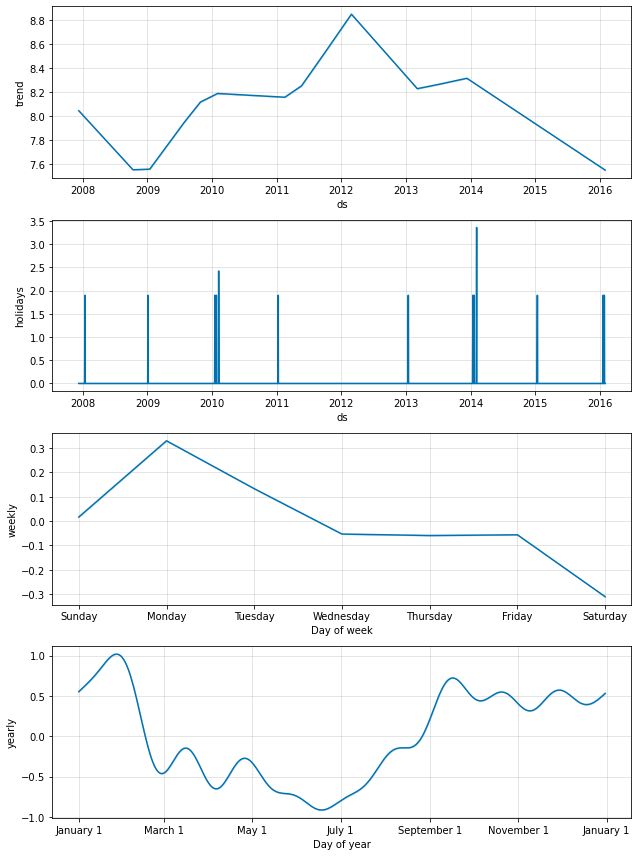

In [7]:
m.plot(forecast)
m.plot_components(forecast)